In [51]:
import pandas as pd 
import numpy as np
import torchvision
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pylab as plt
import sklearn 
from sklearn import linear_model as lm
import warnings
warnings.filterwarnings('ignore')
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from tensorflow.keras.utils import set_random_seed
from sklearn.preprocessing import OneHotEncoder 
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.optimizers import SGD
from tensorflow import keras 
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input,Concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy 


In [52]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
path = '/content/drive/MyDrive'
os.chdir(path)


In [54]:
# Data download and preprocessing
DOWNLOAD_MNIST = True # If already download, set as False 
train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, # this is training data
                                        # transform=torchvision.transforms.ToTensor(),
                                        download=DOWNLOAD_MNIST)
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
# change the features to numpy
X_train = train_data.train_data.numpy() 
X_test = test_data.test_data.numpy()
# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy()

# 1

## 1a

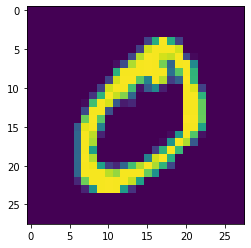

In [ ]:
plt.imshow(np.reshape(X_train[1], (28,28)))

In [ ]:
Y_train[1]

0

## 1b

In [ ]:
X_train.ndim

3

In [ ]:
X_test.ndim

3

In [ ]:
X_train= (X_train-X_train.min())/ (X_train.max() - X_train.min())
X_test = (X_test-X_test.min())/ (X_test.max() - X_test.min())

## 1c

In [ ]:
from sklearn.preprocessing import OneHotEncoder 

Y_train_onehot= OneHotEncoder().fit_transform(Y_train.reshape(-1,1)).toarray()
print(Y_train_onehot)
Y_train_onehot.shape

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


(60000, 10)

In [ ]:
Y_test_onehot= OneHotEncoder().fit_transform(Y_test.reshape(-1,1)).toarray()
print(Y_test_onehot)
Y_test_onehot.shape

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(10000, 10)

One-hot encoding is used to convert categorical variables into a format that can be readily used by machine learning algorithms. The basic idea of one-hot encoding is to create new variables that take on values 0 and 1 to represent the original categorical values. It makes our data more useful and expressive, and it can be rescaled easily


# 2

## 2a

We require X to be 2D array and Y to be 1D array. So, we reshape X and use original Y instead of one-hot encoded Y.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
reshaped_X_train= X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
reshaped_X_train.shape
reshaped_X_test= X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))
reshaped_X_test.shape

(10000, 784)

### SVM

In [ ]:
svm_clf = SVC(kernel='rbf')
svm_clf.fit(reshaped_X_train, Y_train)
y_pred = svm_clf.predict(reshaped_X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
metrics.accuracy_score(Y_test, y_pred)

0.9792

In [ ]:
svm_acu = metrics.accuracy_score(Y_test, y_pred)
print(f'The SVM test error is : {1-svm_acu:.3f}')

The SVM test error is : 0.021


The test error of SVM with Gaussian Kernel is about 2.1%, which is a little greater than the results on a particular project 1.4%. I think try different combination of C and gamma will increase the accuracy.

### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 13), n_estimators = 100, learning_rate = 0.05)
ada.fit(reshaped_X_train, Y_train)
y_pred_ada = ada.predict(reshaped_X_test)

In [ ]:
print(classification_report(Y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.94      0.95      0.95      1010
           4       0.96      0.94      0.95       982
           5       0.94      0.94      0.94       892
           6       0.97      0.97      0.97       958
           7       0.96      0.95      0.96      1028
           8       0.93      0.93      0.93       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
metrics.accuracy_score(Y_test, y_pred_ada)

0.9542

I tried different max_depth to calculate the test error and finally chose max_depth = 13. The test error of Adaboost with decision tree classification as base estimator is about 4.6%, which close to the results on a particular project 4.05%.

### KNN

In [ ]:
'''
for i in range (1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(reshaped_X_train, Y_train)
    y_pred_knn2 = knn2.predict(reshaped_X_test)
    knn_test_error_each = 1 - metrics.accuracy_score(Y_test, y_pred_knn2)
    print(str(i)+ " Error rate = "+ str(knn_test_error_each))
'''

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(reshaped_X_train, Y_train)
y_pred_knn = knn.predict(reshaped_X_test)

print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
metrics.accuracy_score(Y_test, y_pred_knn)

0.9705

I tried different n_neighbers from 1 to 20 and then chose 3 as the best parameter. The test error is about 3%, which is smaller than the results given in the table 5%.

## 2b

### tuned SVM

In [ ]:
svm2 = SVC(C=5, gamma = 0.01)
svm2.fit(reshaped_X_train, Y_train)
y_pred2 = svm2.predict(reshaped_X_test)
print(classification_report(Y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
svm2_acu = metrics.accuracy_score(Y_test, y_pred2)
print(f'The SVM2 test error is :  {1-svm2_acu: .4f}')

The SVM2 test error is :   0.0168


In [ ]:
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(reshaped_X_train, Y_train)
y_pred3 = svm_poly.predict(reshaped_X_test)
print(classification_report(Y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
svm3_acu = metrics.accuracy_score(Y_test, y_pred3)
print(f'The SVM3 test error is :  {1-svm3_acu: .3f}')

The SVM3 test error is :   0.023


In [ ]:
svm_poly = SVC(kernel='poly', degree=2)
svm_poly.fit(reshaped_X_train, Y_train)
y_pred3 = svm_poly.predict(reshaped_X_test)
print(classification_report(Y_test,y_pred3))
svm3_acu = metrics.accuracy_score(Y_test, y_pred3)
print(f'The SVM3 test error is :  {1-svm3_acu: .3f}')

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

The SVM3 test error is :   0.023


I tried different combination of gamma and C, different degree with poly kernel. The model with C =1, gamma = 0.01 turns out to be the best I have. The test error is about 1.7%, which is outperform all three of the classifier I implemented in part 2(a).

### tried CNN

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow import keras 
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input,Concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import datasets, layers, models

In [ ]:
import pandas as pd 
import numpy as np
import torchvision
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pylab as plt
import sklearn 
from sklearn import linear_model as lm
import warnings
warnings.filterwarnings('ignore')
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Data download and preprocessing
DOWNLOAD_MNIST = True # If already download, set as False 
train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, # this is training data
                                        # transform=torchvision.transforms.ToTensor(),
                                        download=DOWNLOAD_MNIST)
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
# change the features to numpy
X_train = train_data.train_data.numpy() 
X_test = test_data.test_data.numpy()
# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy()

In [ ]:
# reshape dataset to have a single channel
trainX = X_train.reshape((X_train.shape[0], 28, 28, 1))
testX = X_test.reshape((X_test.shape[0], 28, 28, 1))
# one hot encode target values
trainY = to_categorical(Y_train)
testY = to_categorical(Y_test)

# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
trainX = train_norm / 255.0
testX = test_norm / 255.0

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
model = define_model()

In [ ]:
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)

In [ ]:
score = model.evaluate(testX, testY, verbose=0)

In [ ]:
print('Test accuracy:', score[1])

Test accuracy: 0.9914000034332275


In [ ]:
print(f'The CNN test error is :  {1-score[1]: .3f}')

The CNN test error is :   0.009


The CNN model test error is about 0.8%, which is outperform all three of the classifier I implemented in part 2(a).


# 3

## 3a

In [4]:
seed_range = 6
epoch =150

In [ ]:
# reshape dataset to have a single channel
train_x = X_train.reshape((X_train.shape[0], 784, 1))
test_x = X_train.reshape((X_train.shape[0], 784, 1))
# convert train
train_x = train_x.astype('float32')/ 255.0
test_x  = test_x.astype('float32')/ 255.0

In [ ]:
def fit_model(X, y, epoch):
  sgd = SGD(learning_rate= 0.1)
  model = Sequential()
  model.add(Dense(100, activation='relu', input_shape=(784,)))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer=sgd,loss=SparseCategoricalCrossentropy(), 
                  metrics=[SparseCategoricalAccuracy()])
  model = model.fit(X,y,epochs=150,verbose = 0, validation_split=0.2, batch_size=128)
  return model

In [ ]:
def savemodel(seed_range,epoch):
    for i in range(0, seed_range):
      set_random_seed(i)
      sgd = SGD(learning_rate= 0.1)
      model = Sequential()
      model.add(Dense(100, activation='relu', input_shape=(784,)))
      model.add(Dense(10, activation='softmax'))
      model.compile(optimizer=sgd,loss=SparseCategoricalCrossentropy(), 
                    metrics=[SparseCategoricalAccuracy()])
      model.fit(train_x,Y_train,epochs=150,verbose = 0, 
                validation_split=0.2, batch_size=128)
      model.save('model%d.h5'%(i))

In [ ]:
savemodel(seed_range,epoch)

In [ ]:
def savehistory(seed_range,epoch):
    for i in range(0, seed_range):
      set_random_seed(i)
      model = fit_model(train_x,Y_train,epoch)
      np.save('history%d.npy'%(i),model.history)


In [ ]:
savehistory(6,150)

In [23]:
def cross_plot(history,i):
    # CrossEntropy Plot
    plt.plot(history['loss'], color='b', label="Training loss")
    plt.plot(history['val_loss'], color='r', label="validation loss")
    best_epoch = history['val_loss'].index(min(history['val_loss']))
    plt.axvline(best_epoch, color='m', label='Best epoch')
    plt.xlabel('epoch')
    plt.ylabel('average CrossEntropy')
    plt.title('Cross-entropy Error using seed=%d'%(i))
    plt.legend(['Training loss','Validation loss'],loc='best')
    plt.show()


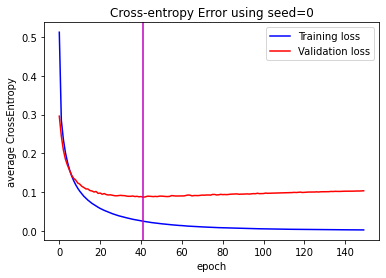

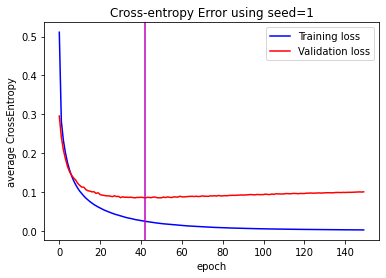

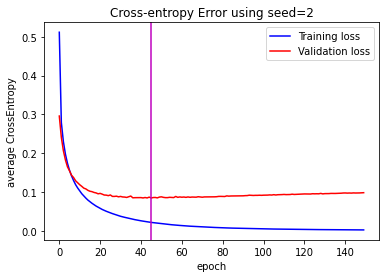

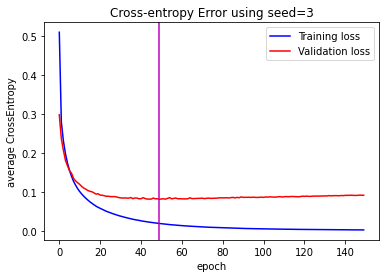

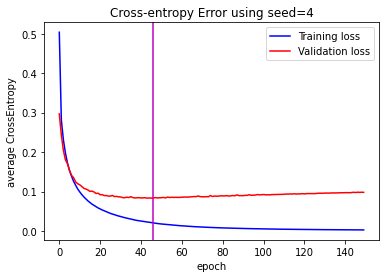

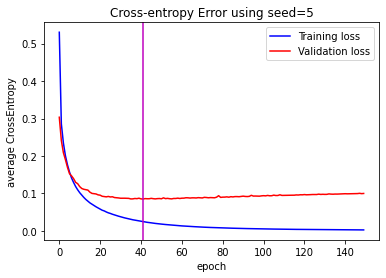

In [24]:
for i in range(0, 6):
  history = np.load('history%d.npy'%(i),allow_pickle='TRUE').item()
  cross_plot(history,i)

## 3b

In [31]:
def mis_error_plot(history):
  x = np.repeat(1,150)
  # Missclassification error Plot
  plt.plot((x - history['sparse_categorical_accuracy'])*100, color='b', label="training set")
  plt.plot((x-history['val_sparse_categorical_accuracy'])*100, color='r', label="validation set")
  best_epoch = history['val_sparse_categorical_accuracy'].index(max(history['val_sparse_categorical_accuracy']))
  plt.axvline(best_epoch, color='m', label='Best epoch')
  plt.xlabel('epoch')
  plt.ylabel('mis-classification error')
  plt.title('Mis-classification error using seed=%d'%(i))
  plt.legend(['Training loss','Validation loss'],loc='best')
  plt.show()

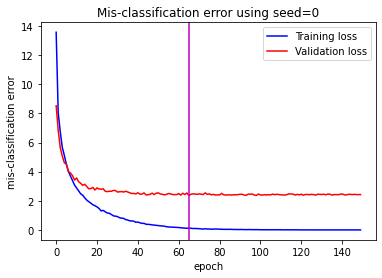

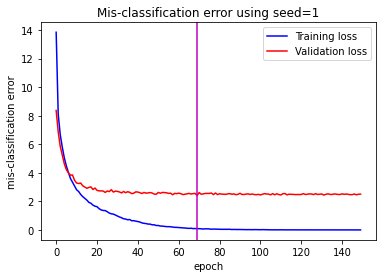

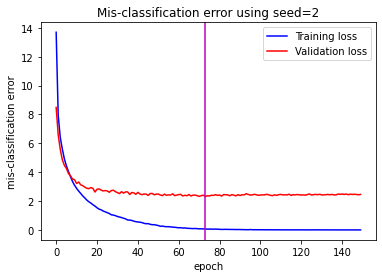

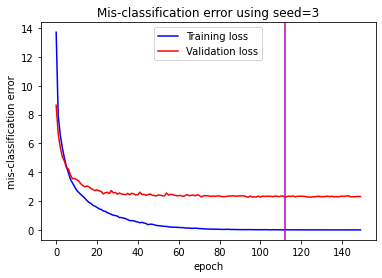

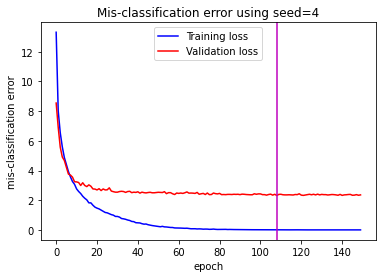

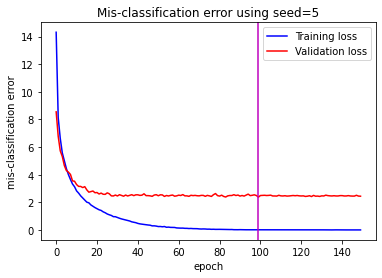

In [32]:
for i in range(0, 6):
  set_random_seed(i)
  history = np.load('history%d.npy'%(i),allow_pickle='TRUE').item()
  mis_error_plot(history)

## 3c

In [33]:
def acc(seed):
  max_accu = []
  for i in range(0, seed):
    history = np.load('history%d.npy'%(i),allow_pickle='TRUE').item()
    max_accu.append( max(history['val_sparse_categorical_accuracy']))
  return max_accu


In [34]:
acc(6)

[0.9763333201408386,
 0.9759166836738586,
 0.9769166707992554,
 0.9773333072662354,
 0.9768333435058594,
 0.9762499928474426]

From above results, model with seed 3 has the highest accuracy among 6 models. So, my best model is model with seed 3.

In [36]:
model3 = load_model('model3.h5')

In [37]:
model3.layers[0].get_weights()[0].shape

(784, 100)

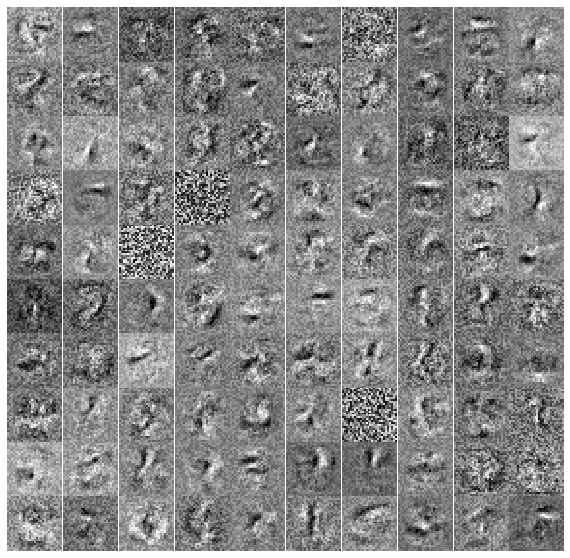

In [44]:
params = model3.layers[0].get_weights()[0].T
plt.figure(figsize=(10, 10))
for i in range(params.shape[0]):
    plt.subplot(10, 10, i + 1) # Since we know it is a 10 x 10 grid
    im = params[i,:]
    im =  im.reshape((28,28))
    plt.imshow( im, cmap = "gray", interpolation = "nearest")
    plt.axis("off")

plt.subplots_adjust(wspace=0, hspace=0)

## 3d


In [46]:
lr = [0.1,0.01,0.2,0.5]
momentum = [0.0, 0.5, 0.9]
set_random_seed(3)

In [47]:
def fit_model_tune(X, y, epoch):
  sgd = SGD(learning_rate= 0.1)
  model = Sequential()
  model.add(Dense(100, activation='relu', input_shape=(784,)))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer=sgd,loss=SparseCategoricalCrossentropy(), 
                  metrics=[SparseCategoricalAccuracy()])
  model = model.fit(X,y,epochs=150,verbose = 0, validation_split=0.2, batch_size=128)
  return model

In [48]:
def tune(lr, momentum):
    for i in lr:
      for j in momentum:
          sgd = SGD(learning_rate= i, momentum = j)
          model = Sequential()
          model.add(Dense(100, activation='relu', input_shape=(784,)))
          model.add(Dense(10, activation='softmax'))
          model.compile(optimizer=sgd,loss=SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])
          model = model.fit(train_x,Y_train, epochs=150,verbose = 0, validation_split=0.2, batch_size=128)
          np.save('test_lr:'+str(i)+'m:' + str(j)+'.npy',model.history)


In [ ]:
tune(lr, momentum)

In [ ]:
def tunecross(lr,momentum):
  tune_cross = []
  for i in lr:
      for j in momentum:
        tunehistory = np.load('test_lr:'+str(i)+'m:' + str(j)+'.npy',allow_pickle='TRUE').item()
        tune_cross.append(np.mean(tunehistory['val_loss']))
  return tune_cross

In [ ]:
def tuneacc(lr,momentum):
  tune_accu = []
  for i in lr:
      for j in momentum:
        tunehistory = np.load('test_lr:'+str(i)+'m:' + str(j)+'.npy',allow_pickle='TRUE').item()
        tune_accu.append(100*(1-np.mean(tunehistory['val_sparse_categorical_accuracy'])))
  return tune_accu

In [ ]:
a = tuneacc(lr,momentum)
misclass = [a[i:i+3] for i in range(0,len(a), 3)]

df_misclass = pd.DataFrame(misclass,columns = [momentum[0],momentum[1],momentum[2]], 
                      index = [lr[0],lr[1],lr[2], lr[3]])
df_misclass.index.name = 'Learning Rate'
df_misclass.columns.name = 'Momentum'
df_misclass.style.set_precision(5).highlight_min(color = 'lightpink').set_caption("%incorrect with hightlight the minimum")

Momentum,0.0,0.5,0.9
Learning Rate,,,
0.1,2.71728,2.40333,2.19272
0.01,4.82000,3.69722,2.74933
0.2,2.46228,2.23644,2.18239
0.5,2.24433,2.27278,4.34922


In [ ]:
b = tunecross(lr,momentum)
cross= [b[i:i+3] for i in range(0,len(b), 3)]
df_cross = pd.DataFrame(cross,columns = [momentum[0],momentum[1],momentum[2]], 
                      index = [lr[0],lr[1],lr[2], lr[3]])
df_cross.index.name = 'lr'
df_cross.columns.name = 'm'
df_cross.style.set_precision(5).highlight_min(color = 'lightpink').set_caption("average cross entropy with hightlight the minimum")

m,0.0,0.5,0.9
lr,,,
0.1,0.10046,0.10005,0.11498
0.01,0.17362,0.13092,0.09860
0.2,0.09511,0.10405,0.13654
0.5,0.10197,0.11311,0.75166


### plot

In [49]:
def plot_history(history, model_name):
  epoch = 150
  best_epoch = history['val_loss'].index(min(history['val_loss']))
  fig, ax = plt.subplots(figsize=(6,4))
  plt.title(' '.join([model_name, 'model learning curve - Max accuracy on test is %1.4f' % max(history['val_sparse_categorical_accuracy'])]))
  ax.set_xlabel('Epochs')
  ax.set_xticks(range(epoch),10)
  ax.set_ylabel('Error')
  ax.plot(range(epoch), history['loss'], 'r', label='Train Loss')
  ax.plot(range(epoch), history['val_loss'], 'orange', label='Test Loss')
  ax.axvline(best_epoch, color='m', lw=4, alpha=0.5, label='Best epoch')
  x = np.repeat(1,epoch)
  ax.plot(range(epoch), x-history['sparse_categorical_accuracy'], 'g', label='Train Accuracy')
  ax.plot(range(epoch), x-history['val_sparse_categorical_accuracy'], 'b', label='Test Accuracy')
  ax.legend()
  
  plt.show()

lr:  0.1 & momentum:  0.0


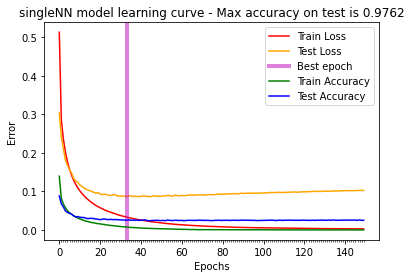

lr:  0.1 & momentum:  0.5


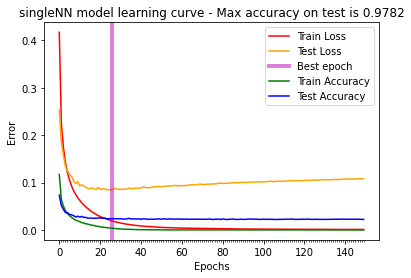

lr:  0.1 & momentum:  0.9


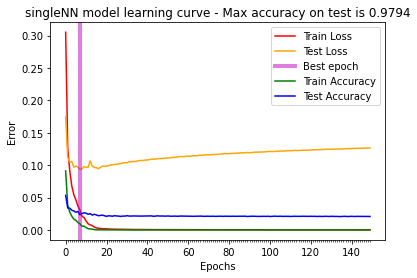

lr:  0.01 & momentum:  0.0


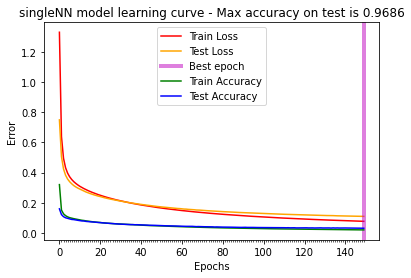

lr:  0.01 & momentum:  0.5


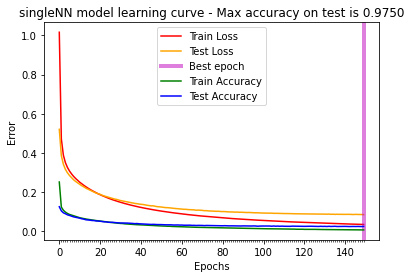

lr:  0.01 & momentum:  0.9


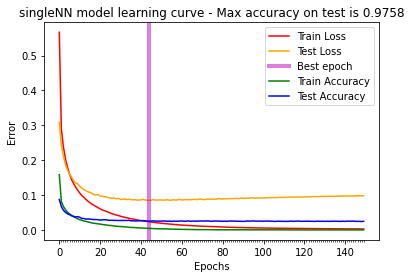

lr:  0.2 & momentum:  0.0


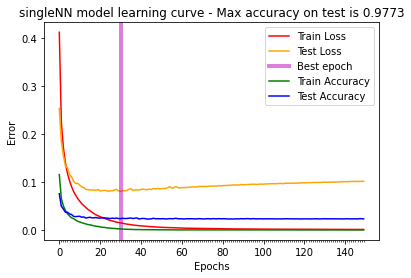

lr:  0.2 & momentum:  0.5


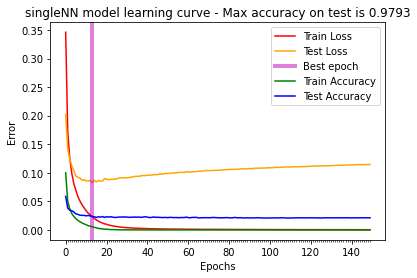

lr:  0.2 & momentum:  0.9


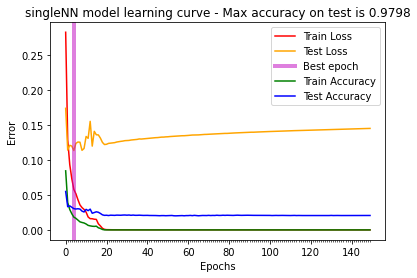

lr:  0.5 & momentum:  0.0


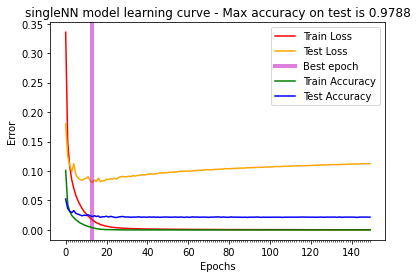

lr:  0.5 & momentum:  0.5


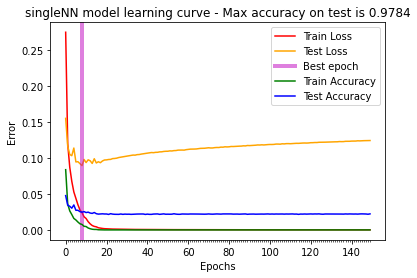

lr:  0.5 & momentum:  0.9


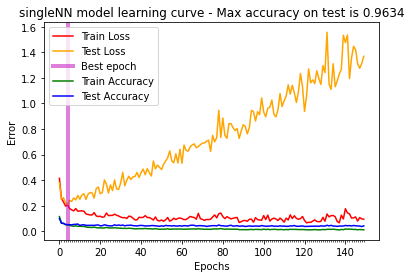

In [50]:
model_name = 'singleNN'
for i in lr:
  for j in momentum:
    history = np.load('test_lr:'+str(i)+'m:' + str(j)+'.npy',allow_pickle='TRUE').item()
    print('lr: ', i,'& momentum: ',j)
    plot_history(history, model_name)

#4


## 4a: CNN Redo 3a

In [33]:
# reshape dataset to have a single channel
trainX = X_train.reshape((X_train.shape[0], 28, 28, 1))
testX = X_test.reshape((X_test.shape[0], 28, 28, 1))
# one hot encode target values
trainY = to_categorical(Y_train)
testY = to_categorical(Y_test)

# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
trainX = train_norm / 255.0
testX = test_norm / 255.0

In [61]:
seed_range = 6
epoch = 80

In [35]:
def cnn(seed):
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3,3), 
                   activation='relu', 
                   input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
	# compile model
  np.random.seed(seed)
  opt = SGD(learning_rate=0.01)
  model.compile(optimizer=opt, 
                loss=losses.CategoricalCrossentropy(), 
                metrics=['accuracy'])
  return model


In [36]:
def savemodel(seed_range,epoch):
    for i in range(0, seed_range):
      set_random_seed(i)
      model = cnn(i)
      model.fit(trainX, trainY, 
                    validation_data=(testX, testY), 
                    epochs=epoch, 
                    batch_size=128,
                    verbose=0)
      model.save('cnnmodel%d.h5'%(i))

In [37]:
def savehistory(seed_range,epoch):
    for i in range(0, seed_range):
      set_random_seed(i)
      model = cnn(i)
      model = model.fit(trainX, trainY, 
                    validation_data=(testX, testY), 
                    epochs=epoch, 
                    batch_size=128,
                    verbose=0)
      np.save('cnnhistory%d.npy'%(i),model.history)

In [ ]:
savehistory(seed_range,epoch)

In [ ]:
savemodel(seed_range,epoch)

### plot

In [57]:
def cross_plot(history,i):
    # CrossEntropy Plot
    plt.plot(history['loss'], color='b', label="Training loss")
    plt.plot(history['val_loss'], color='r', label="validation loss")
    best_epoch = history['val_loss'].index(min(history['val_loss']))
    plt.axvline(best_epoch, color='m', label='Best epoch')
    plt.xlabel('epoch')
    plt.ylabel('average CrossEntropy')
    plt.title('Cross-entropy Error using seed=%d'%(i))
    plt.legend(['Training loss','Validation loss'],loc='best')
    plt.show()


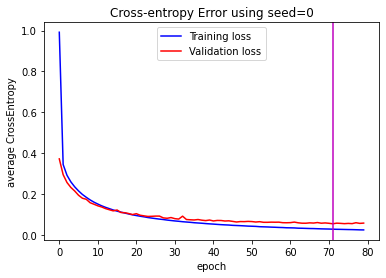

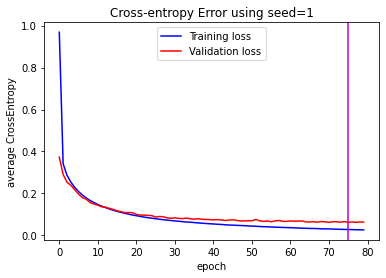

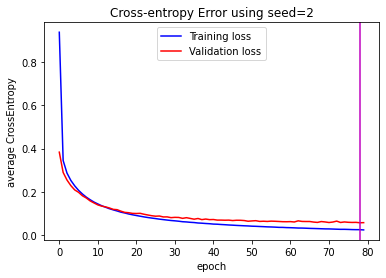

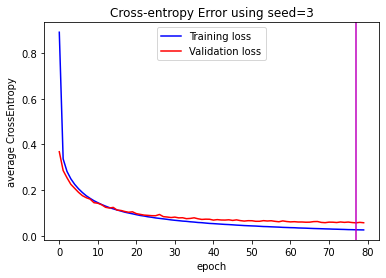

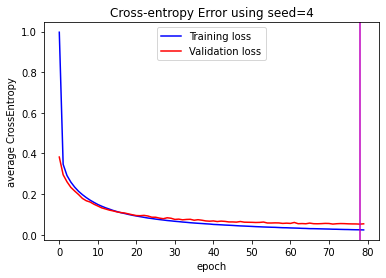

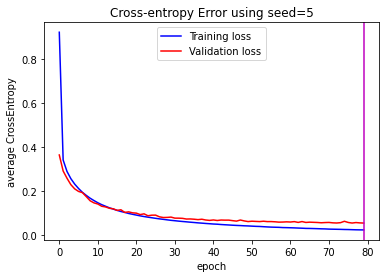

In [58]:
for i in range(0, 6):
  history = np.load('cnnhistory%d.npy'%(i),allow_pickle='TRUE').item()
  cross_plot(history,i)

## 4b: CNN Redo 3b

In [69]:
def mis_error_plot(history,seed,epoch):
  x = np.repeat(1,epoch)
  # Missclassification error Plot
  plt.plot((x - history['accuracy'])*100, color='b', label="training set")
  plt.plot((x-history['val_accuracy'])*100, color='r', label="validation set")
  best_epoch = history['val_accuracy'].index(max(history['val_accuracy']))
  plt.axvline(best_epoch, color='m', label='Best epoch')
  plt.xlabel('epoch')
  plt.ylabel('mis-classification error')
  plt.title('Mis-classification error using seed=%d'%(seed))
  plt.legend(['Training set','Validation set'],loc='best')
  plt.show()

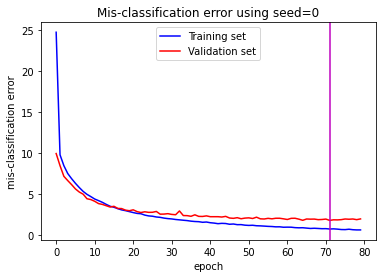

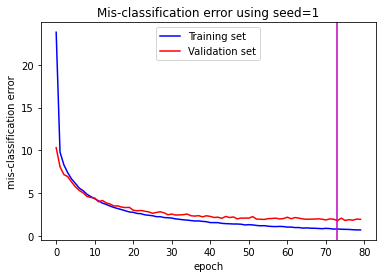

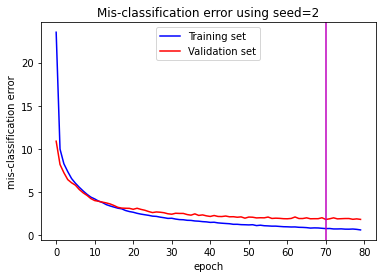

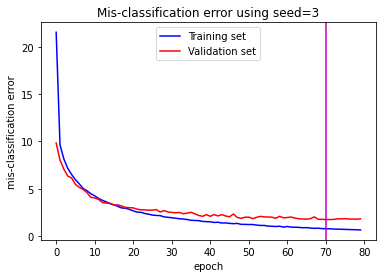

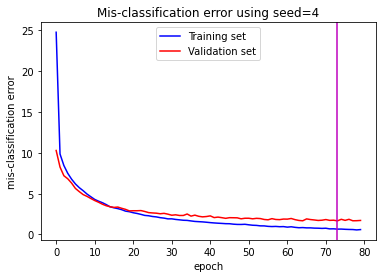

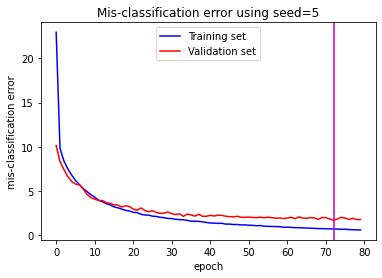

In [70]:
for i in range(0, 6):
  set_random_seed(i)
  history = np.load('cnnhistory%d.npy'%(i),allow_pickle='TRUE').item()
  mis_error_plot(history,i,epoch)

## 4c: CNN Redo 3c

In [71]:
def cnnacc(seed):
  max_accu = []
  for i in range(0, seed):
    history = np.load('cnnhistory%d.npy'%(i),allow_pickle='TRUE').item()
    max_accu.append( max(history['val_accuracy']))
  return max_accu

In [72]:
cnnacc(seed_range)

[0.9819999933242798,
 0.9824000000953674,
 0.9817000031471252,
 0.9825000166893005,
 0.983299970626831,
 0.9830999970436096]

when seed is 4, the model has highest accuracy.

In [73]:
cnnmodel4 = load_model('cnnmodel4.h5')

In [13]:
cnnmodel4.layers

In [14]:
cnnmodel4.layers[0].get_weights()[0].T.shape

(32, 1, 3, 3)

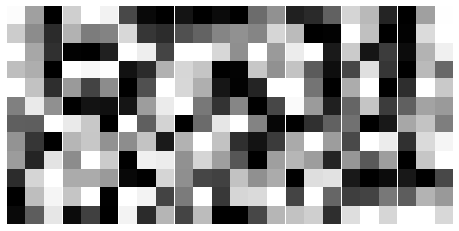

In [75]:
params = cnnmodel4.layers[0].get_weights()[0].T
plt.figure(figsize=(8, 4))
for i in range(params.shape[0]):
    plt.subplot(4, 8, i + 1) 
    im = params[i,:]
    im =  im.reshape((3,3))
    plt.imshow( im, cmap = "gray", interpolation = "nearest")
    plt.axis("off")

plt.subplots_adjust(wspace=0, hspace=0)

## 4d: CNN Redo 3d

In [46]:
lr = [0.1,0.01,0.2,0.5]
momentum = [0.0, 0.5, 0.9]
set_random_seed(3)

In [56]:
def cnntune(lr, momentum):
    for i in lr:
      for j in momentum:
        opt = SGD(learning_rate=i, momentum=j)
        model = Sequential()
        model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(100, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dense(10, activation='softmax'))
        model.compile(optimizer=opt, loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])
        model = model.fit(trainX, trainY, 
                    validation_data=(testX, testY), 
                    epochs=epoch, 
                    batch_size=128,
                    verbose=0)

        np.save('cnntest_lr:'+str(i)+'m:' + str(j)+'.npy',model.history)


In [57]:
cnntune(lr, momentum)

In [66]:
def plot_history(history, model_name):
  best_epoch = history['val_loss'].index(min(history['val_loss']))
  fig, ax = plt.subplots(figsize=(6,4))
  plt.title(' '.join([model_name, 'model learning curve - Max accuracy on test is %1.4f' % max(history['val_accuracy'])]))
  ax.set_xlabel('Epochs')
  ax.set_xticks(range(epoch),10)
  ax.set_ylabel('Error')
  ax.plot(range(epoch), history['loss'], 'r', label='Train Loss')
  ax.plot(range(epoch), history['val_loss'], 'orange', label='Test Loss')
  ax.axvline(best_epoch$, color='m', lw=4, alpha=0.5, label='Best epoch')
  x = np.repeat(1,epoch)
  ax.plot(range(epoch), x-history['accuracy'], 'g', label='Train Accuracy')
  ax.plot(range(epoch), x-history['val_accuracy'], 'b', label='Test Accuracy')
  ax.legend()
  
  plt.show()

lr:  0.1 & momentum:  0.0


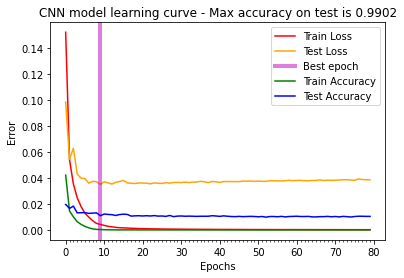

lr:  0.1 & momentum:  0.5


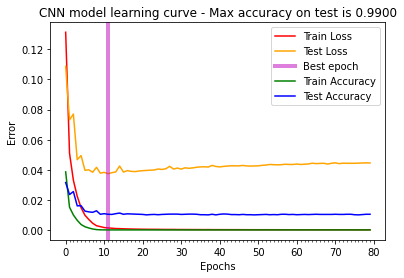

lr:  0.1 & momentum:  0.9


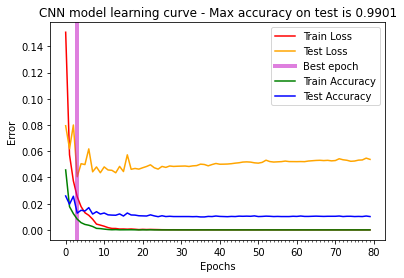

lr:  0.01 & momentum:  0.0


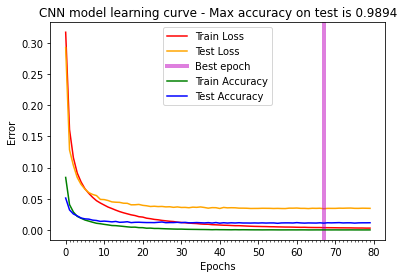

lr:  0.01 & momentum:  0.5


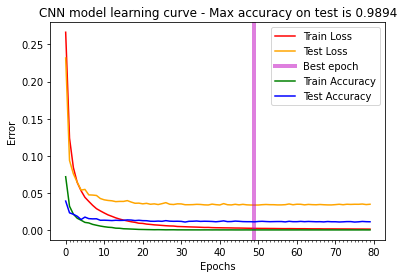

lr:  0.01 & momentum:  0.9


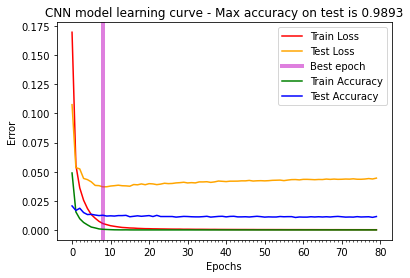

lr:  0.2 & momentum:  0.0


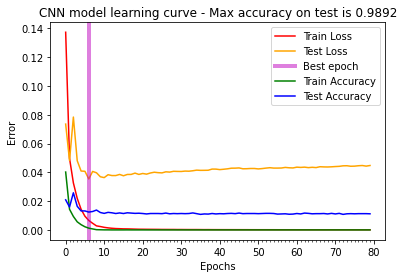

lr:  0.2 & momentum:  0.5


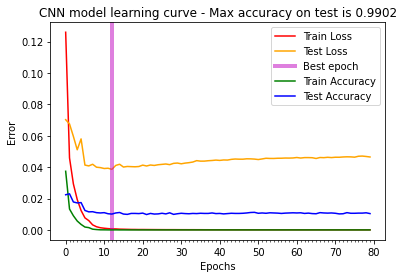

lr:  0.2 & momentum:  0.9


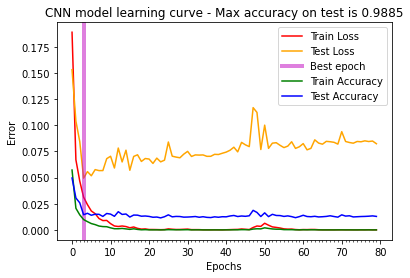

lr:  0.5 & momentum:  0.0


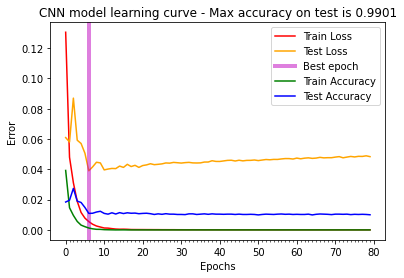

lr:  0.5 & momentum:  0.5


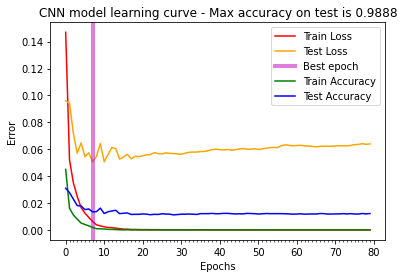

lr:  0.5 & momentum:  0.9


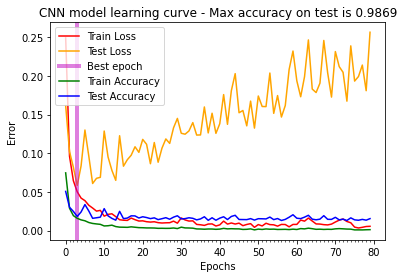

In [67]:
model_name = 'CNN'
for i in lr:
  for j in momentum:
    history = np.load('cnntest_lr:'+str(i)+'m:' + str(j)+'.npy',allow_pickle='TRUE').item()
    print('lr: ', i,'& momentum: ',j)
    plot_history(history, model_name)